Figure saved as 'figure_calibration_comparison.png' and 'figure_calibration_comparison.pdf'


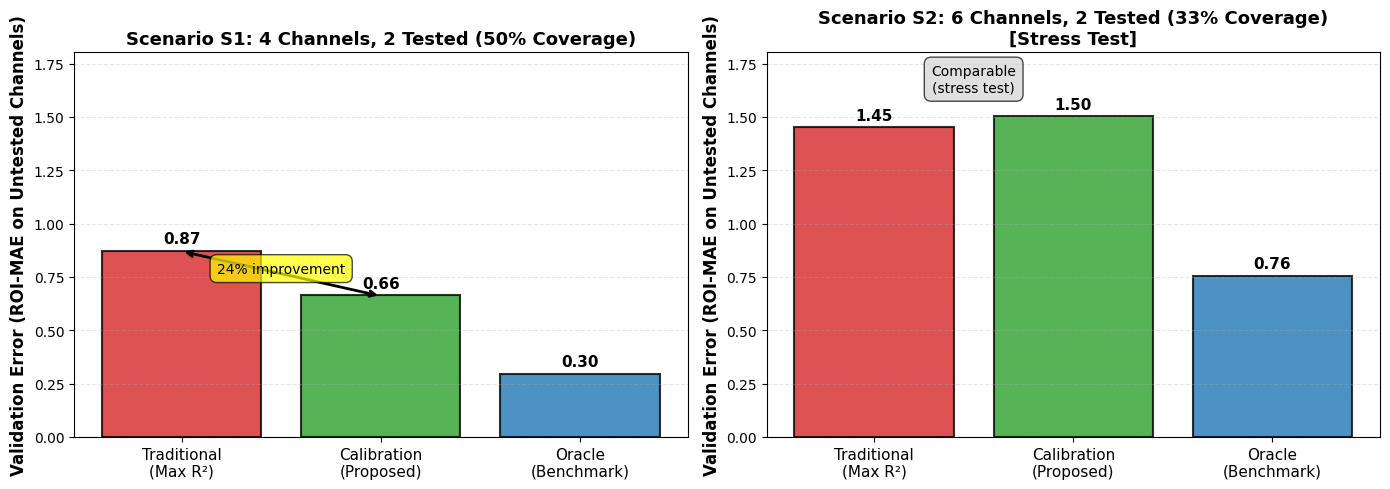

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data from the results
data = {
    'Scenario': ['S1', 'S1', 'S1', 'S2', 'S2', 'S2'],
    'Criterion': ['Traditional\n(Max R²)', 'Calibration\n(Proposed)', 'Oracle\n(Benchmark)', 
                  'Traditional\n(Max R²)', 'Calibration\n(Proposed)', 'Oracle\n(Benchmark)'],
    'Validation_Error': [0.873340083, 0.664764283, 0.29624197, 
                         1.450318807, 1.50294554, 0.756309124],
    'Selected_Model': ['Weibull C-shape', 'Hill S-shape', 'Hill C (No Adstock)',
                       'Weibull C-shape', 'Weibull S (No Adstock)', 'Hill C (No Adstock)']
}

df = pd.DataFrame(data)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Color scheme
colors = ['#d62728', '#2ca02c', '#1f77b4']  # Red for Traditional, Green for Calibration, Blue for Oracle

# S1 subplot
s1_data = df[df['Scenario'] == 'S1']
bars1 = axes[0].bar(range(3), s1_data['Validation_Error'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_xticks(range(3))
axes[0].set_xticklabels(['Traditional\n(Max R²)', 'Calibration\n(Proposed)', 'Oracle\n(Benchmark)'], fontsize=11)
axes[0].set_ylabel('Validation Error (ROI-MAE on Untested Channels)', fontsize=12, fontweight='bold')
axes[0].set_title('Scenario S1: 4 Channels, 2 Tested (50% Coverage)', fontsize=13, fontweight='bold')
axes[0].set_ylim(0, max(df['Validation_Error']) * 1.2)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars1, s1_data['Validation_Error'])):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{val:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add improvement annotation
axes[0].annotate('', xy=(1, 0.66), xytext=(0, 0.87),
                arrowprops=dict(arrowstyle='<->', color='black', lw=2))
axes[0].text(0.5, 0.77, '24% improvement', ha='center', fontsize=10, 
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# S2 subplot
s2_data = df[df['Scenario'] == 'S2']
bars2 = axes[1].bar(range(3), s2_data['Validation_Error'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_xticks(range(3))
axes[1].set_xticklabels(['Traditional\n(Max R²)', 'Calibration\n(Proposed)', 'Oracle\n(Benchmark)'], fontsize=11)
axes[1].set_ylabel('Validation Error (ROI-MAE on Untested Channels)', fontsize=12, fontweight='bold')
axes[1].set_title('Scenario S2: 6 Channels, 2 Tested (33% Coverage)\n[Stress Test]', fontsize=13, fontweight='bold')
axes[1].set_ylim(0, max(df['Validation_Error']) * 1.2)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars2, s2_data['Validation_Error'])):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{val:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add "Comparable" annotation
axes[1].text(0.5, 1.62, 'Comparable\n(stress test)', ha='center', fontsize=10,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.7))

plt.tight_layout()
plt.savefig('figure_calibration_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig('figure_calibration_comparison.pdf', bbox_inches='tight')
print("Figure saved as 'figure_calibration_comparison.png' and 'figure_calibration_comparison.pdf'")
plt.show()
